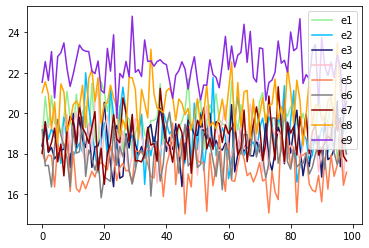

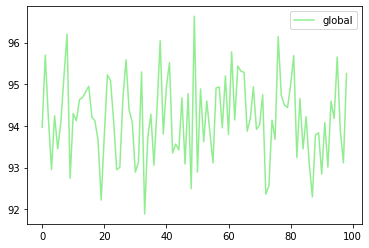

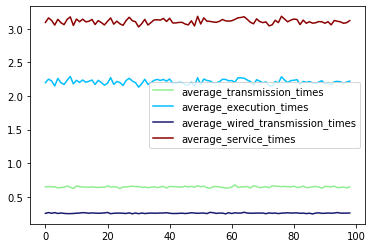

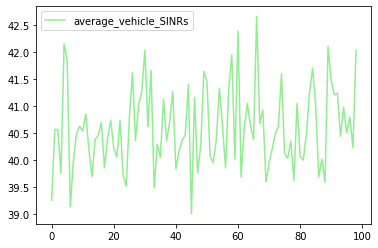

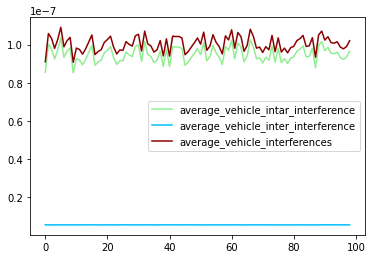

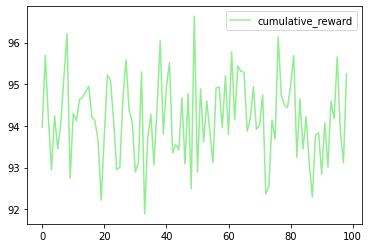

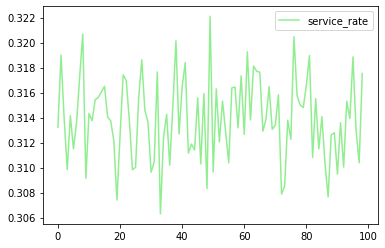

cumulative_reward:  94.18573386335889
average_edge_reward:  19.187212278633336
service_rate:  0.31395244621119633
average_interference:  1.0042271641403706e-07
average_service_time:  3.111865862016569
average_wired_transmission_time:  0.2543226511718012


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)


# task_request_rate_0_3
file_name = "/home/neardws/acme/0121b7e2-002c-11ed-a5e9-04d9f5632a58/"

# task_request_rate_0_3_5
# file_name = "/home/neardws/acme/dcece3ba-002b-11ed-8e16-04d9f5632a58/"

# task_request_rate_0_4
file_name = "/home/neardws/acme/82b51c28-002b-11ed-9ec7-04d9f5632a58/"

# task_request_rate_0_4_5
# file_name = "/home/neardws/acme/773f7ce4-002b-11ed-97a2-04d9f5632a58/"

# task_request_rate_0_5
# file_name = "/home/neardws/acme/5da156e0-002b-11ed-bc19-04d9f5632a58/"

start_index = 0
returns_file_name = file_name + "logs/environment_loop/logs.csv"


name=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference", "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "episodes", "service_rate", "steps", "steps_per_second"]
returns_df = pd.read_csv(returns_file_name, names=name, header=0)

episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s


start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return.shape[0])]

epoch_index = epoch_index[start_index:end_index]

e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[start_index:end_index, 9].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()

average_transmission_times = returns_df["average_transmision_times"].values
average_execution_times = returns_df["average_execution_times"].values
average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
average_service_times = returns_df["average_service_times"].values
plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
plt.legend(loc="best")  # 图例
plt.show()

cumulative_reward = returns_df["cumulative_reward"].values
plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
plt.legend(loc="best")  # 图例
plt.show()

service_rate = returns_df["service_rate"].values
plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
plt.legend(loc="best")  # 图例
plt.show()

maximum_cumulative_reward_index = cumulative_reward.mean()

print("cumulative_reward: ", cumulative_reward.mean())
print("average_edge_reward: ", (returns[:, 0].mean() + returns[:, 1].mean() + returns[:, 2].mean() + returns[:, 3].mean() + returns[:, 4].mean() + returns[:, 5].mean() + returns[:, 6].mean() + returns[:, 7].mean() + returns[:, 8].mean() ) / 9)
print("service_rate: ", service_rate.mean())
print("average_interference: ", average_vehicle_interferences.mean())
print("average_service_time: ", average_service_times.mean())
print("average_wired_transmission_time: ", average_wired_transmission_times.mean())
